In [1]:
%reload_ext autoreload
%autoreload 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from utils.waves import WaveGenerator
from nn.nn import generate_data, create_nn, create_nn2, train_nn, eval_nn

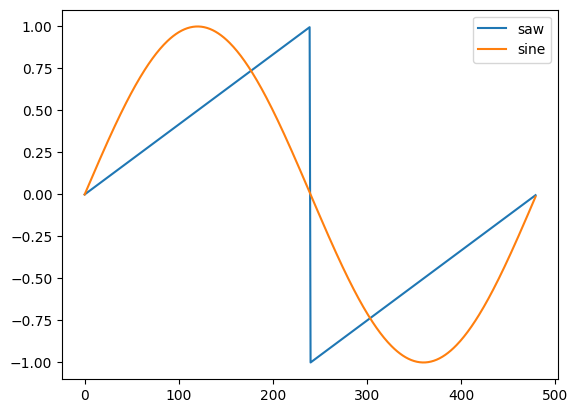

In [3]:
wg = WaveGenerator()

plt.plot(wg.gen_wave('saw', 100, 5)[:480], label='saw')
plt.plot(wg.gen_wave('sine', 100, 5)[:480], label='sine')
plt.legend()
plt.show()

In [40]:
secs = 1/64
X, y, X_train, y_train, X_test, y_test = generate_data(10000, secs=secs)

In [41]:
model = create_nn2(input_shape=X.shape[1])
history, model = train_nn(model, X, y, batch_size_frac=0.5)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               75100     
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 200)               20200     
                                                                 
 dense_33 (Dense)            (None, 300)               60300     
                                                                 
 dense_34 (Dense)            (None, 500)               150500    
                                                                 
 dense_35 (Dense)            (None, 1)                 501       
                                                                 
Total params: 316,701
Trainable params: 316,701
Non-tr

Epoch 1/2250
2/2 [==============================] - 0s 93ms/step - loss: 99.9976 - val_loss: 99.9750
Epoch 2/2250
2/2 [==============================] - 0s 45ms/step - loss: 99.9684 - val_loss: 99.9214
Epoch 3/2250
2/2 [==============================] - 0s 43ms/step - loss: 99.9082 - val_loss: 99.8010
Epoch 4/2250
2/2 [==============================] - 0s 43ms/step - loss: 99.7722 - val_loss: 99.5412
Epoch 5/2250
2/2 [==============================] - 0s 42ms/step - loss: 99.4934 - val_loss: 99.0015
Epoch 6/2250
2/2 [==============================] - 0s 45ms/step - loss: 98.9044 - val_loss: 97.9298
Epoch 7/2250
2/2 [==============================] - 0s 47ms/step - loss: 97.7614 - val_loss: 95.9596
Epoch 8/2250
2/2 [==============================] - 0s 48ms/step - loss: 95.7923 - val_loss: 93.4102
Epoch 9/2250
2/2 [==============================] - 0s 46ms/step - loss: 93.0708 - val_loss: 91.0563
Epoch 10/2250
2/2 [==============================] - 0s 53ms/step - loss: 90.3890 - val_los

30/30 [==============================] - 0s 956us/step


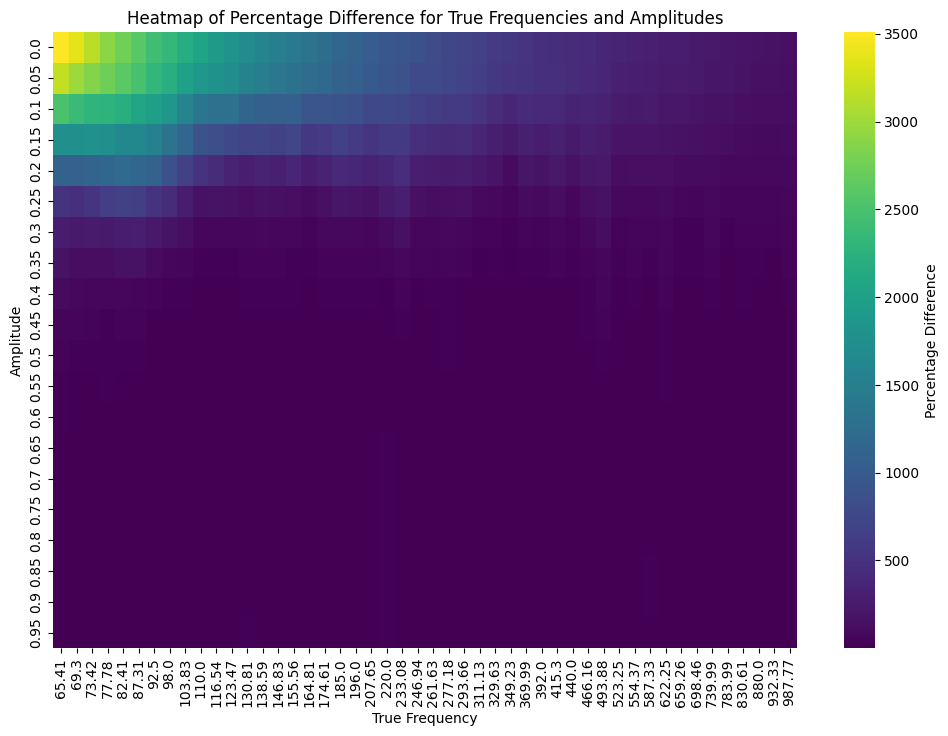

In [42]:
eval_nn(model, secs=secs, max_freq=1000)

In [43]:
model.save("../models/note_detect.h5", save_format="h5")

In [77]:
wg = WaveGenerator()
model.predict(np.stack([wg.gen_wave('sine', 92.25, secs=secs, noise_sd=0.01, amplitude=0.8)]))

1/1 [==============================] - 0s 18ms/step


array([[91.00038]], dtype=float32)

In [81]:
model.weights[0]

<tf.Variable 'dense_30/kernel:0' shape=(750, 100) dtype=float32, numpy=
array([[-0.04834602,  0.04905887, -0.06003502, ...,  0.09696717,
         0.08549256, -0.01691406],
       [ 0.00394905,  0.04647798, -0.02266435, ...,  0.03846775,
         0.01543683, -0.03467563],
       [-0.06335458,  0.06348921, -0.07165626, ...,  0.03469031,
        -0.03422335, -0.01601808],
       ...,
       [-0.01111012,  0.00748888,  0.0387978 , ...,  0.0257333 ,
        -0.03406557, -0.02403991],
       [-0.01522689, -0.04027664,  0.00194958, ...,  0.05456462,
         0.00627839, -0.08863942],
       [-0.10994013, -0.01053968,  0.00563582, ...,  0.05770607,
         0.06017403, -0.00195895]], dtype=float32)>